# Team Introduction : DATA ROASTERY

In [ ]:
from IPython.display import Image
Image(url="https://drive.google.com/uc?export=view&id=1t8hke-6maCHlZNVAJ4MtKckjsa3nmlj1", width = 1000 )

**Our members:**
- Data Analyst : Gede Wira W & Imam Ahmad Q
- Data Scientist : Destya Fabiola & Yandi Fajrahman
- Business Analyst : Rifqi Adhityatama & Lutfi Arsi Astuti
- Machine Learning Engineer : Hans Mulyadi & Maria Jose V. B


# Stage 0 : Preparation

**Problem Statement** </br>
Tingginya minat berwisata selepas COVID-19, menjadi peluang bagi PT Travel Amanah Berkah untuk menawarkan paket asuransi perjalanan. Dataset berdasarkan penjualan paket asuransi periode 2019 menunjukan bahwa hanya 35.73% (701 dari 1987) customer yang membeli asuransi perjalanan, sehingga conversion rate dan pendapatan ROI dari paket asuransi masih tergolong rendah. Oleh sebab itu, perusahaan ingin menggunakan model prediksi untuk memprediksi customer yang berpeluang membeli asuransi perjalanan sehingga dapat membantu manajemen dalam merumuskan strategi marketing/targeting maupun promosi kepada nasabah yang tepat agar meningkatkan pembelian dan pendapatan ROI.

**Goals** </br>
- Meningkatkan frekuensi pembelian paket asuransi perjalanan  setelah menggunakan model machine learning
- Meningkatkan pendapatan / ROI pembelian asuransi perjalanan setelah menggunakan model machine learning

**Objectives** </br>
- Membangun model prediksi Machine Learnings untuk menentukan apakah customer akan membeli asuransi perjalanan atau tidak.
- Menentukan tipe-tipe customer yang tertarik membeli asuransi perjalanan atau tidak.

# Stage 1 : EDA, Insights & Visualizations

## 0 Preparation

### 0.0 Importing

In [ ]:
# Import modules
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

# Preprocessing-related modules
import pandas as pd
import numpy as np
from numpy import percentile
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Visualization-related modules
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.colors as mcolors

# Imbalance-related modules
from imblearn.over_sampling import SMOTE

# ML- Related modules
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate, RandomizedSearchCV, GridSearchCV, train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# Load Dataset
df = pd.read_csv(r'D:/Obsidian Notes/1. Works/02 Rakamin Bootcamp/Student/Final Project/TravelInsurancePrediction.csv')

### 0.1 Customization

In [ ]:
# Theme

In [ ]:
# Custom colors
primary = '#fa444aff'
secondary = '#2160afff'
colors = [primary, secondary]
colors_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", [secondary, primary])

In [ ]:
# Custom functions

In [ ]:
# Function for plotting numerical data
def numerical_plotting(plot):
    plt.figure(figsize=(15, 10))
    for i in range(0, len(numericals)):
        plt.subplot(1, len(numericals), i+1)
        if plot == 'box':
            sns.boxplot(y=df[numericals[i]], color=primary, orient='v', showfliers=True)
        elif plot == 'dist':
            sns.distplot(df[numericals[i]], color=secondary)
        elif plot == 'violin':
            sns.violinplot(y=df[numericals[i]], color=primary, orient='v')
        else :
            None
        plt.tight_layout()

In [ ]:
# Function for Label Encoding
def label_encode(data):
  for col in data[label_encode_ft] :
    data[col] = le.fit_transform(data[col])

In [ ]:
# Function for feature standarization
def standardize(data):
  for col in data[unstandardized_ft] :
    data[col] = StandardScaler().fit_transform(data[[col]])

In [ ]:
#scoring
def eval_classification(model):
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print(f"ML Model : {model}")

    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))

    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))

    print(("--")*50)


#feature_importance
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

#show hyperparameter
def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## 1 Exploratory Data Analysis

### 1.1 Descriptive Statistics :

In [ ]:
# Check Dataset
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
# Get Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [ ]:
# Get Dataset shape
df.shape

(1987, 10)

Dataset ini memiliki 10 columns dan 1987 rows.

In [ ]:
# Separate categorical and numerical columns
categoricals = df.select_dtypes(include='object').columns.tolist()
numericals = df.select_dtypes(include=('int64', 'float')).columns.tolist()

In [ ]:
# Check missing values
df.isna().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

Tidak adanya missing values pada dataset.


In [ ]:
# Check duplicated data
df.duplicated().sum()

0

Tidak adanya duplicate data pada dataset.

#### - Observations :

1. Dataset ini memiliki 10 columns dan 1987 rows.
2. Terdapat Column **Unnamed: 0** tanpa keterangan nama pada fitur ini, untuk stage 1 kami masih gunakan column ini sebagai mana adanya.
3. Pengelompokkan columns berdasarkan numericals dan categoricals.
4. Tidak adanya missing values pada dataset (akan dikonfirmasi lebih lanjut dengan menggunakan syntax untuk melihat missing values).
5. Tidak adanya duplicated data pada dataset (akan dikonfirmasi lebih lanjut dengan menggunakan syntax untuk melihat duplicated data).

### 1.2 Statistical Summary :

In [ ]:
# Describe numerical data
df[numericals].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1987.0,993.000000,573.741812,0.0,496.5,993.0,1489.5,1986.0
Age,1987.0,29.650226,2.913308,25.0,28.0,29.0,32.0,35.0
AnnualIncome,1987.0,932762.959235,376855.684748,300000.0,600000.0,900000.0,1250000.0,1800000.0
FamilyMembers,1987.0,4.752894,1.609650,2.0,4.0,5.0,6.0,9.0
ChronicDiseases,1987.0,0.277806,0.448030,0.0,0.0,0.0,1.0,1.0
TravelInsurance,1987.0,0.357323,0.479332,0.0,0.0,0.0,1.0,1.0


In [ ]:
# Describe categorical data
df[categoricals].describe().T

,count,unique,top,freq
Employment Type,1987,2,Private Sector/Self Employed,1417
GraduateOrNot,1987,2,Yes,1692
FrequentFlyer,1987,2,No,1570
EverTravelledAbroad,1987,2,No,1607


#### - Observations :

1. Fitur dengan right skew atau positive skew adalah **Age**, **AnnualIncome**, **ChronicDiseasses**, dan **TravelInsurance**.
2. Fitur dengan left skew atau negative skew adalah **FamilyMembers**.
3. **Unnamed: 0** tidak disebutkan dalam kedua skew tersebut karena kami menganggap fitur ini sebagai index.
4. Fitur **EmploymentType** memiliki data terbanyak pada **Private Sector/ Self Employed** dengan jumlah data 1417.
5. Fitur **GraduateOrNot** memiliki data terbanyak pada kategori **Yes** dengan jumlah data 1692.
6. Fitur **FrequentFlyer** memiliki data terbanyak pada kategori **No** dengan jumlah data 1570.
7. Fitur **EverTravelledAbroad** memiliki data terbanyak pada kategori **No** dengan jumlah data 1607.


### 1.3 Univariate Analysis :

#### 1.3.1 Numerical Data :

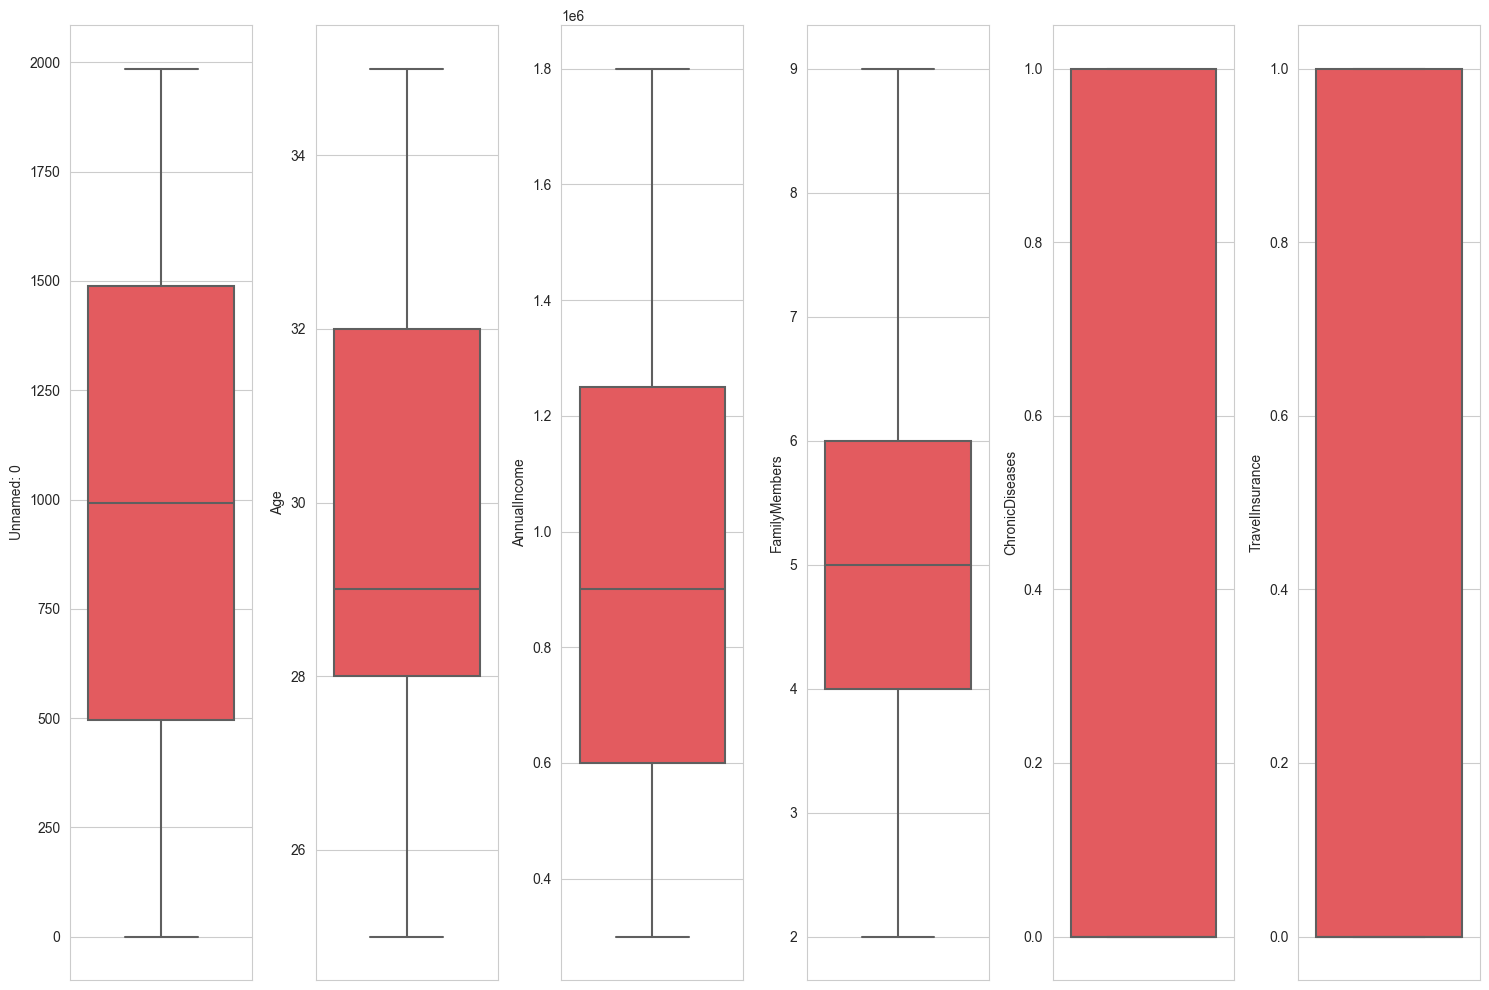

In [ ]:
# Display numerical data distribution using box plot
numerical_plotting('box')

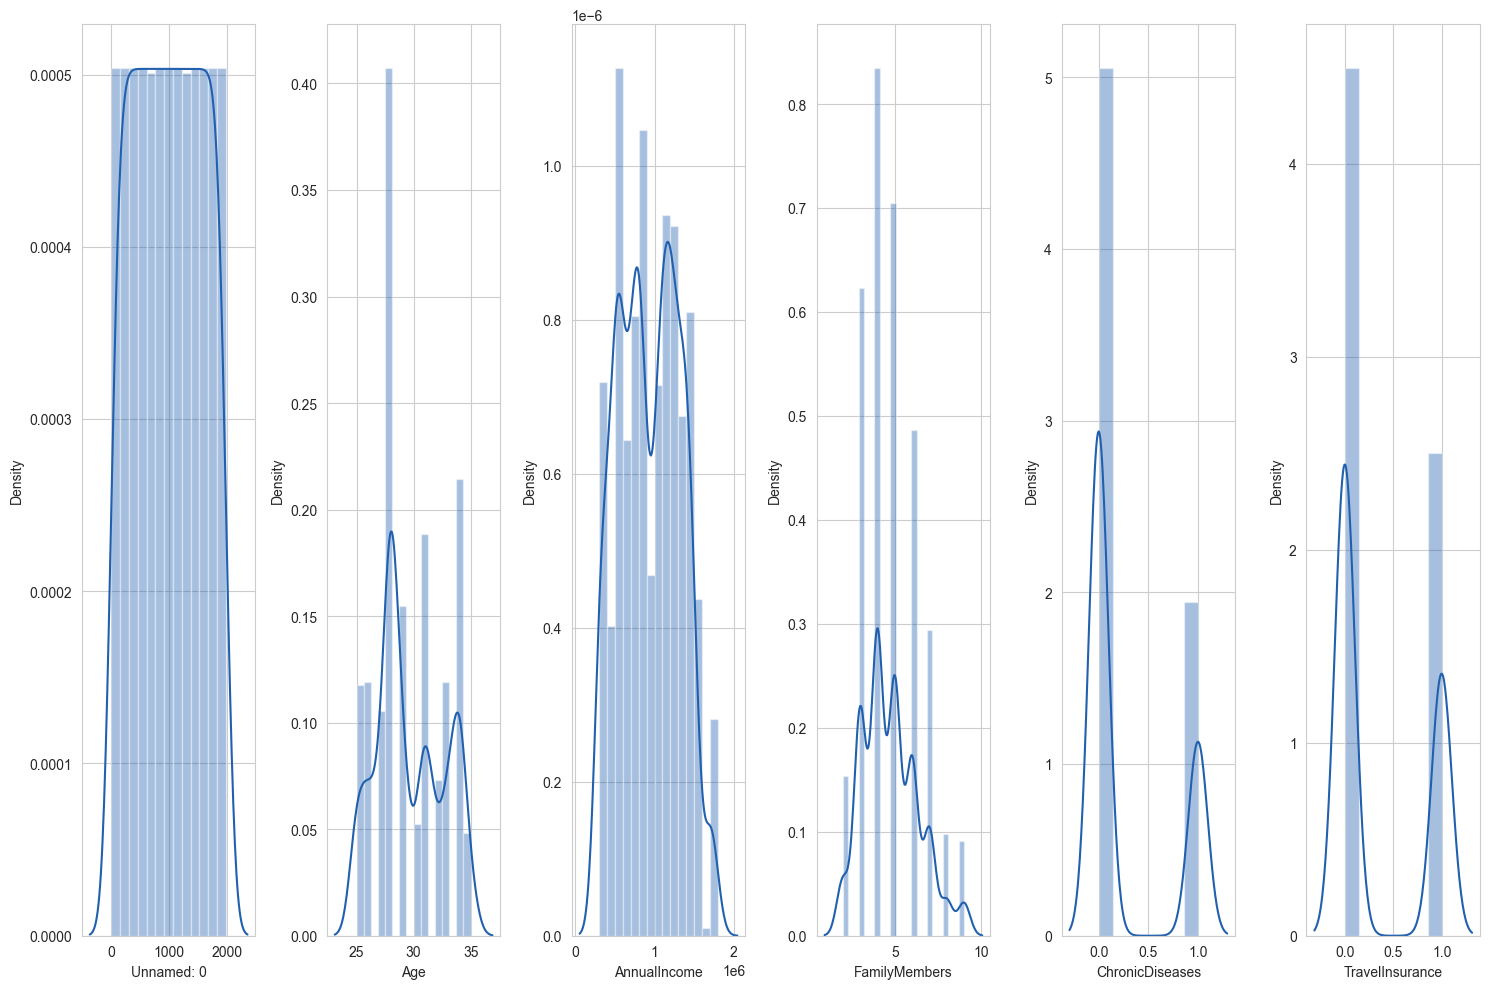

In [ ]:
# Display numerical data distribution using distribution plot
numerical_plotting('dist')

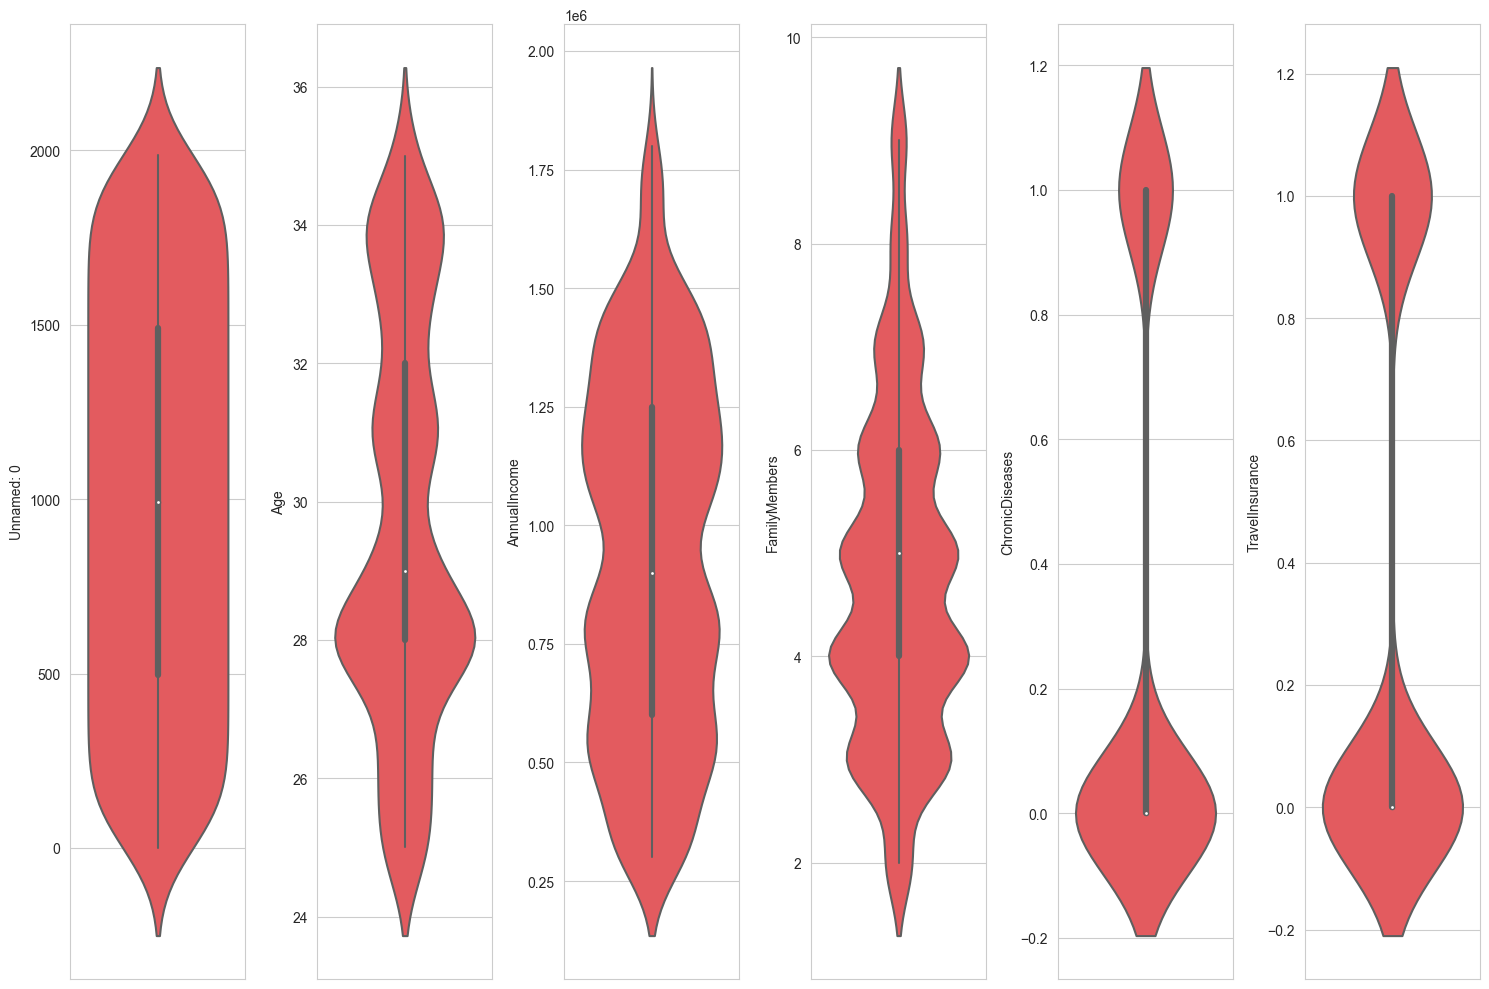

In [ ]:
# Display numerical data distribution using violin plot
numerical_plotting('violin')

In [ ]:
# Search for Outliers using IQR
for i in df.columns:
    if df[i].dtypes in [np.int64, np.float64]:
        print(i, ':', df[i].dtypes)

        Q1 = df[i].quantile(0.25)
        print('Q1 =', Q1)

        Q3 = df[i].quantile(0.75)
        print('Q3 =', Q3)

        IQR = Q3 - Q1
        print('IQR =', IQR)

        nilai_min = df[i].min()
        print('nilai min =', nilai_min)
        min_IQR = Q1 - 1.5 * IQR
        print('Lower Bound =', min_IQR)

        nilai_max = df[i].max()
        print('nilai max =', nilai_max)
        max_IQR = Q3 + 1.5 * IQR
        print('Upper Bound =', max_IQR)

        # Search for outliers
        if nilai_min < min_IQR:
            print('Low outlier is found <', min_IQR)
            print('Low outlier Index:', list(df[df[i] < min_IQR].index))
        if nilai_max > max_IQR:
            print('High outlier is found >', max_IQR)
            print('High outlier Index:', list(df[df[i] > max_IQR].index))

        print('\n')

Unnamed: 0 : int64
Q1 = 496.5
Q3 = 1489.5
IQR = 993.0
nilai min = 0
Lower Bound = -993.0
nilai max = 1986
Upper Bound = 2979.0


Age : int64
Q1 = 28.0
Q3 = 32.0
IQR = 4.0
nilai min = 25
Lower Bound = 22.0
nilai max = 35
Upper Bound = 38.0


AnnualIncome : int64
Q1 = 600000.0
Q3 = 1250000.0
IQR = 650000.0
nilai min = 300000
Lower Bound = -375000.0
nilai max = 1800000
Upper Bound = 2225000.0


FamilyMembers : int64
Q1 = 4.0
Q3 = 6.0
IQR = 2.0
nilai min = 2
Lower Bound = 1.0
nilai max = 9
Upper Bound = 9.0


ChronicDiseases : int64
Q1 = 0.0
Q3 = 1.0
IQR = 1.0
nilai min = 0
Lower Bound = -1.5
nilai max = 1
Upper Bound = 2.5


TravelInsurance : int64
Q1 = 0.0
Q3 = 1.0
IQR = 1.0
nilai min = 0
Lower Bound = -1.5
nilai max = 1
Upper Bound = 2.5




##### - Observations:

1. Tidak terdapat outlier pada data numerical, sehingga tidak perlu dilakukan handling outliers pada stage data preprocessing.
2. **Age** distribusi bimodal perlu dilakukan feature transformation pada stage data preprocessing untuk menjamin kualitas dari algoritma.
3. **AnnualIncome** distribusi mendekati normal.
4. **FamilyMembers** skew kanan perlu dilakukan feature transformation pada stage data preprocessing untuk menjamin kualitas dari algoritma.
5. **ChronicDiseases** dan **TravelInsurance** perlu diubah tipe datanya menjadi categorical, dikarenakan **ChronicDiseases** dan **TravelInsurance** hanya berisi 1 dan 0.

#### 1.3.2 Categorical Data :

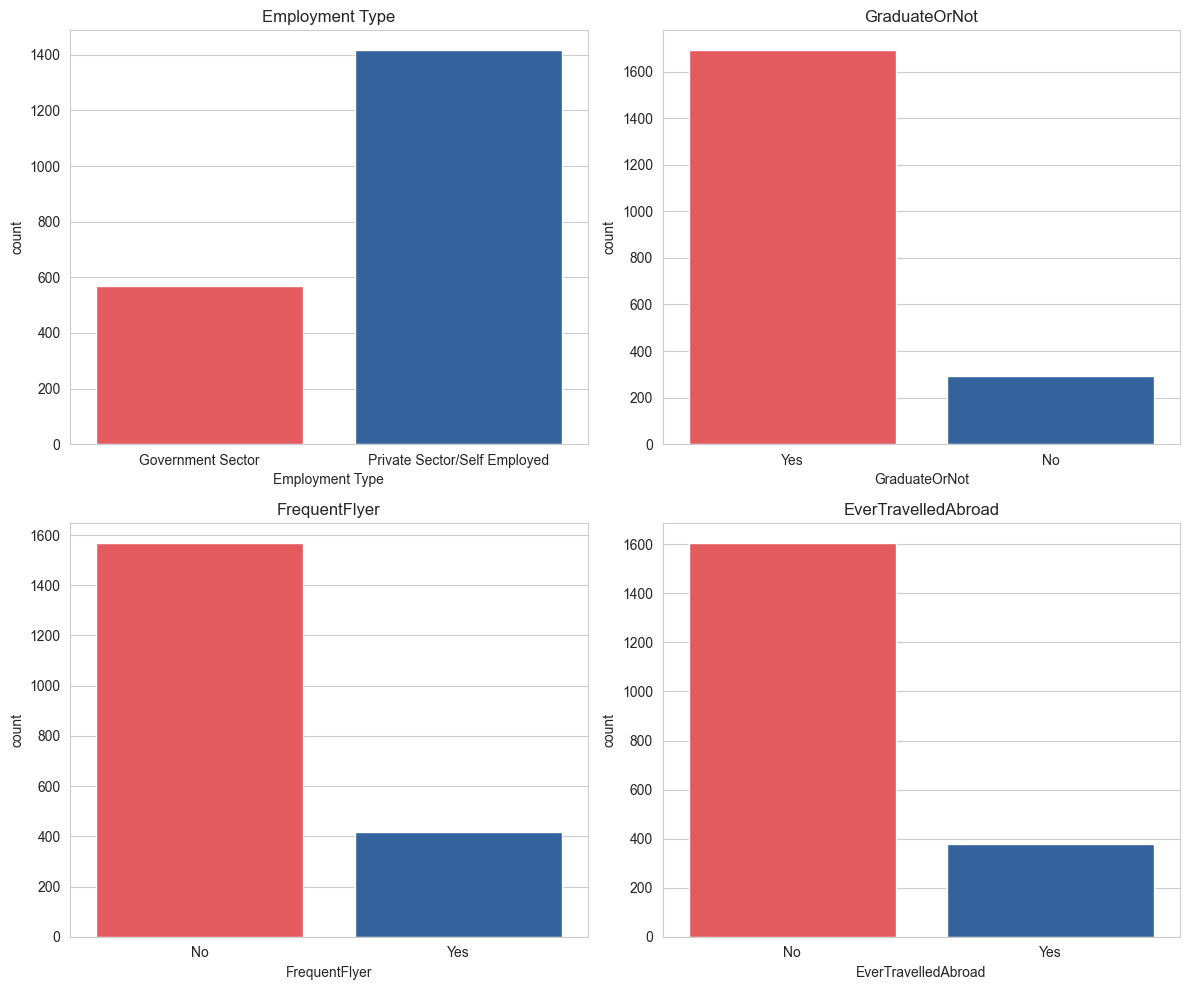

In [ ]:
# Plot categorical data using countplot
# Calculate number of rows and columns for the subplot grid
num_rows = int(len(categoricals) / 2) + len(categoricals) % 2
num_cols = 2

# Create subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))
axes = axes.flatten()

# Create count plots
for i, cat_var in enumerate(categoricals):
    sns.countplot(x=cat_var, data=df, ax=axes[i], palette = colors)
    axes[i].set_title(cat_var)

# Hide empty subplots
for i in range(len(categoricals), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Get categorical data proportions
proportions = {}
for cat_var in categoricals:
    proportions[cat_var] = (df[cat_var].value_counts() / len(df)) * 100

# Display Proportions and Percentages
for cat_var in categoricals:
    print(f"Proportions for {cat_var}:")
    print(proportions[cat_var])
    print("\n")

Proportions for Employment Type:
Private Sector/Self Employed    71.313538
Government Sector               28.686462
Name: Employment Type, dtype: float64


Proportions for GraduateOrNot:
Yes    85.153498
No     14.846502
Name: GraduateOrNot, dtype: float64


Proportions for FrequentFlyer:
No     79.013588
Yes    20.986412
Name: FrequentFlyer, dtype: float64


Proportions for EverTravelledAbroad:
No     80.875692
Yes    19.124308
Name: EverTravelledAbroad, dtype: float64




##### Observations :
- Tipe data kategorik yang terdapat pada dataset masing-masing hanya memiliki 2 kategori (biner). Sehingga, transformasi data menggunakan metode one-hot encoding tidak memungkinkan
- Metode one-hot encoding hanya berlaku digunakan untuk data kategorik bukan merupakan data ordinal dan memiliki kategori lebih dari 2


### 1.4 Multivariate analysis:

In [ ]:
# Copy of dataframe (only for the heatmap)
df2=df.drop(df.columns[0], axis=1)
df3=df2.copy()

In [ ]:
# Mapping of df3 (only for the heatmap)
mapping_EmploymentType = {'Government Sector':1,'Private Sector/Self Employed':0}
mapping_GraduateOrNot = {'Yes':1,'No':0}
mapping_FrequentFlyer = {'Yes':1,'No':0}
mapping_EverTravelledAbroad = {'Yes':1,'No':0}

df3['Employment Type']= df2['Employment Type'].map(mapping_EmploymentType)
df3['GraduateOrNot']= df2['GraduateOrNot'].map(mapping_GraduateOrNot)
df3['FrequentFlyer']= df2['FrequentFlyer'].map(mapping_FrequentFlyer)
df3['EverTravelledAbroad']= df2['EverTravelledAbroad'].map(mapping_EverTravelledAbroad)

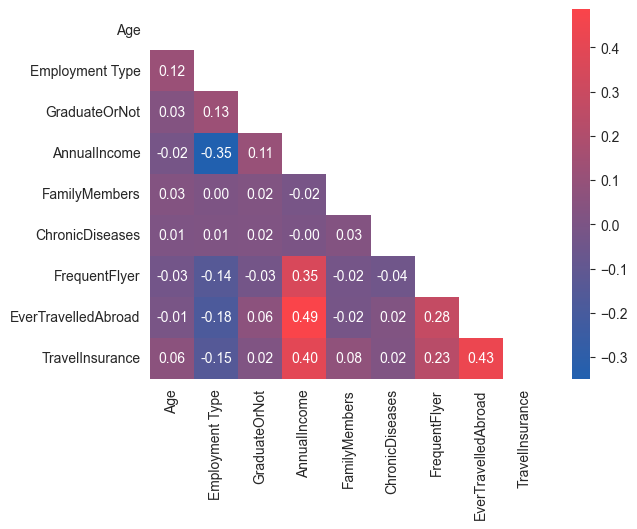

In [ ]:
# creating mask
mask = np.triu(np.ones_like(df3.corr()))
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(df3.corr(), cmap=colors_cmap, annot=True, fmt='.2f', mask=mask)
# displaying heatmap
plt.show()


In [ ]:
# Grouping for pairplot/stripplot
plot_cat = ['Age','Employment Type','GraduateOrNot','AnnualIncome','FamilyMembers','FrequentFlyer','EverTravelledAbroad','TravelInsurance']
plot_num = ['Age', 'AnnualIncome', 'FamilyMembers']

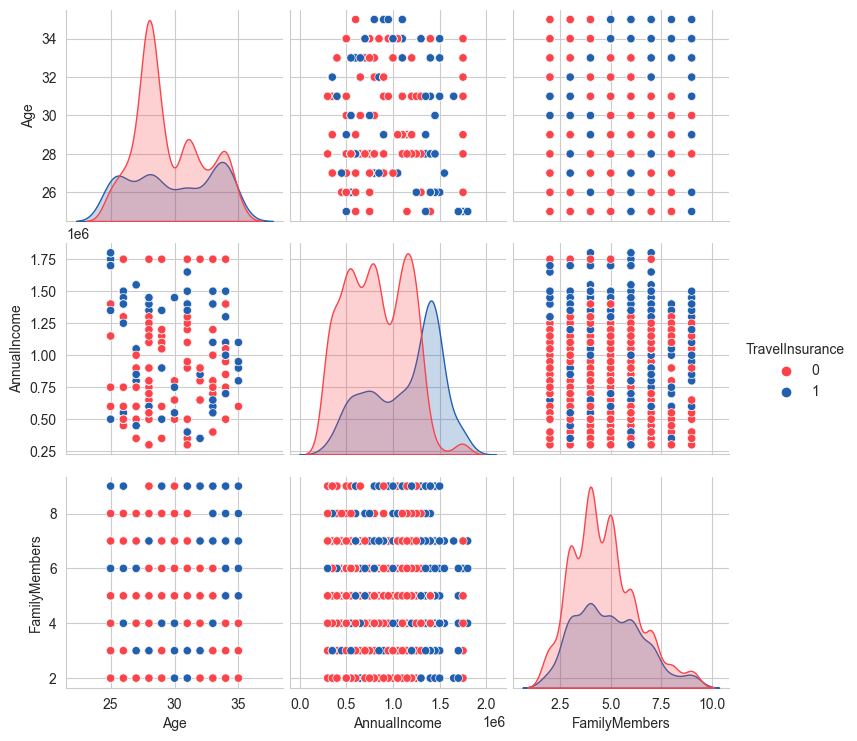

In [ ]:
# Pairplots based on the label TravelInsurance
sns.pairplot(df[plot_cat], diag_kind='kde',hue='TravelInsurance', palette = colors)

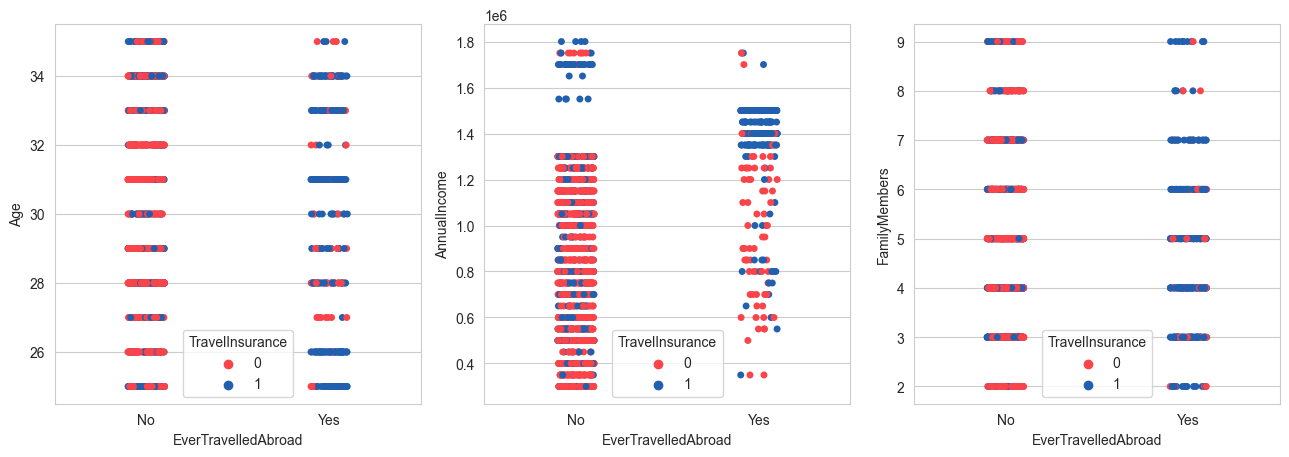

In [ ]:
# Stripplots based on EverTravelledAbroad and the label TravelInsurance
fig = plt.figure(figsize=(13, 13))
for i in range(0, len(plot_num)):
    ax = fig.add_subplot(3,3, i+1)
    sns.stripplot(ax=ax, data=df[plot_cat], x='EverTravelledAbroad', y=plot_num[i], hue='TravelInsurance', palette = colors)
    plt.tight_layout()

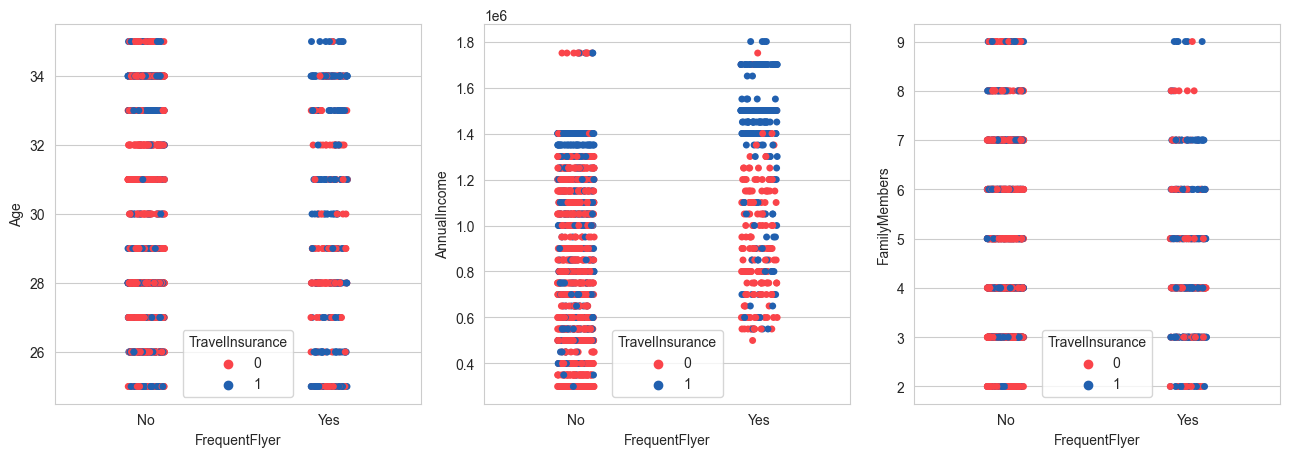

In [ ]:
# Stripplots based on FrequentFlyer and the label TravelInsurance
fig = plt.figure(figsize=(13, 13))
for i in range(0, len(plot_num)):
    ax = fig.add_subplot(3,3, i+1)
    sns.stripplot(ax=ax, data=df[plot_cat], x='FrequentFlyer', y=plot_num[i], hue='TravelInsurance', palette = colors)
    plt.tight_layout()

Dari Striplot di atas terlihat cukup konsisten antara feature EverTraveledAbroad,FrequentFlyer, AnnualIncome dengan label (TravelInsurance)

### 1.5 EDA Conclusions :
1. Terdapat pasang-pasangan feature yang berkorelasi satu sama lain yaitu :
  * FreqentFlyer dan Annual Income (0.35)
  * EverTravelledAbroad dan Annual Income(0.49)
  * EmploymentType dan Annual Income (-0.35)
  (EmplomentType : Private Sector/Self Employed berkorelasi positif dengan Annual Income, Government Sector berkorelasi negatif dengan Annual Income)
  * EverTravelledAbroad dan FrequentFlyer(0.28)
2. Sedangkan feature-feature yang memiliki korelasi tinggi dengan label :
  * TravelInsurance dan Annual Income(0.40)
  * TravelInsurance dan FrequentFlyer(0.23)
  * TravelInsurance dan EverTravelledAbroad(0.43)

-> Further steps :
- Untuk heatmap, tidak ada fitur yang redundant >0.7, jadi tidak perlu ada fitur yang dihilangkan.
- Untuk antar feature yang memiliki korelasi tinggi, bisa di explore lebih lanjut.

## 2 Insights & Business Recommendations :


### 2.1 Low Level Analysis (2 Parameters) :

In [ ]:
#Group TravelInsurance consumers
travel = df.groupby(df['TravelInsurance'])['Unnamed: 0'].count().reset_index()
from decimal import ROUND_UP
travel['Percentage_TI']=round(travel['Unnamed: 0']/(sum(travel['Unnamed: 0']))*100,0)
travel

,TravelInsurance,Unnamed: 0,Percentage_TI
0,0,1277,64.0
1,1,710,36.0


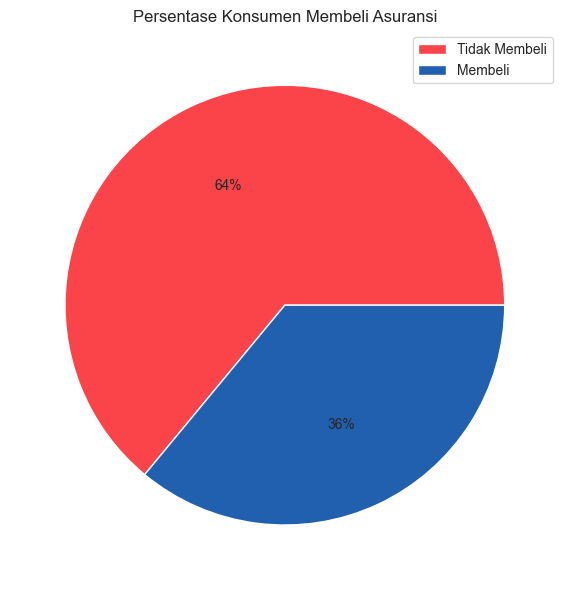

In [ ]:
# Plot TravelInsurance consumers percentage
fig, axes = plt.subplots(figsize = (8, 6))
sns.set_style("whitegrid")
plt.title('Persentase Konsumen Membeli Asuransi')
plt.pie(travel['Percentage_TI'],autopct='%.0f%%', colors = colors)
plt.legend(['Tidak Membeli', 'Membeli'])
plt.tight_layout()
plt.show()

> Insight : Persentase pelanggan yang tidak tertarik membeli travel insurance lebih besar yaitu sebesar 64%.

In [ ]:
# Get age range percentages
age1 = df.groupby(['Age','TravelInsurance']).size().unstack().reset_index()
age1['total'] = age1.drop('Age', axis=1).sum(axis=1)

age1_percentage = age1.copy()
for col in age1_percentage.columns[1:3]:
    age1_percentage[col] = age1_percentage[col] / age1_percentage['total'] * 100

age1_percentage = age1_percentage.drop('total', axis=1)
age1_percentage = age1_percentage.reset_index(drop=True)
age1_percentage = age1_percentage.drop('Age', axis=1)

age1_percentage

TravelInsurance,0,1
0,36.986301,63.013699
1,50.000000,50.000000
2,79.389313,20.610687
3,79.249012,20.750988
4,73.437500,26.562500
5,56.923077,43.076923
6,67.948718,32.051282
7,79.120879,20.879121
8,47.297297,52.702703
9,50.000000,50.000000


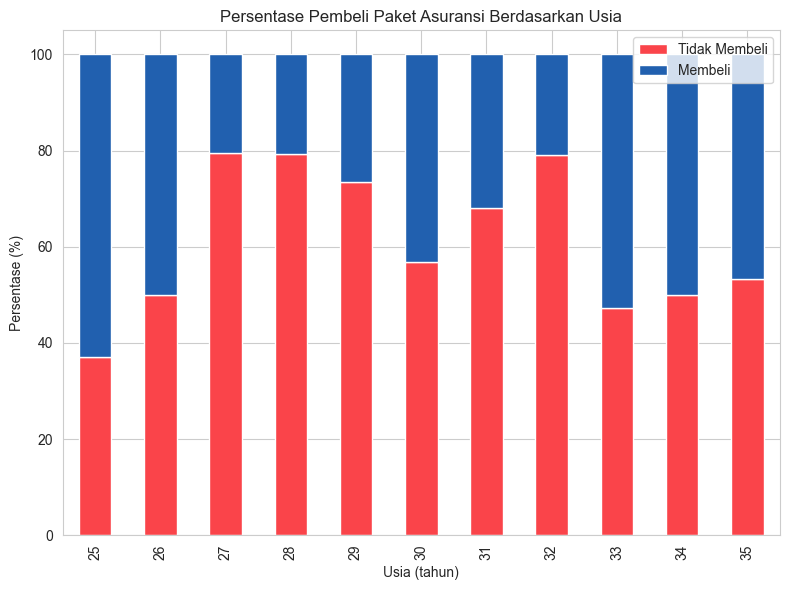

In [ ]:
# Plot TravelInsrance consumption by age range using stacked bar
age = list(range(25, 36))
fig, axes = plt.subplots(figsize = (8, 6))
sns.set_style("whitegrid")

axes1 = age1_percentage.plot(kind='bar', stacked=True, ax = axes, color = colors )
axes1.set_xticklabels(age)  # Set the new x-axis labels

plt.legend(['Tidak Membeli', 'Membeli'])

for label in axes1.get_xticklabels():
    label.set_rotation(90)

plt.title('Persentase Pembeli Paket Asuransi Berdasarkan Usia')
plt.xlabel('Usia (tahun)')
plt.ylabel('Persentase (%)')
plt.tight_layout()

plt.show()

> Insight : Pelanggan dengan umur 27-32tahun terlihat banyak yang tidak tertarik untuk membeli travel insurance. Sedangkan pelanggan umur <= 26 dan >=33 terlihat banyak yg tertarik membeli.



In [ ]:
# Check TravelInsurance percentages according to Employment Type
et1 = df.groupby(['Employment Type','TravelInsurance']).size().unstack().reset_index()
et1['total'] = et1.sum(axis=1)

et1_percentage = et1.copy()
for col in et1_percentage.columns[1:-1]:
    et1_percentage[col] = et1_percentage[col] / et1_percentage['total'] * 100

et1_percentage = et1_percentage.drop('total', axis=1)
et1_percentage = et1_percentage.reset_index(drop=True)

et1_percentage

TravelInsurance,Employment Type,0,1
0,Government Sector,75.438596,24.561404
1,Private Sector/Self Employed,59.774171,40.225829


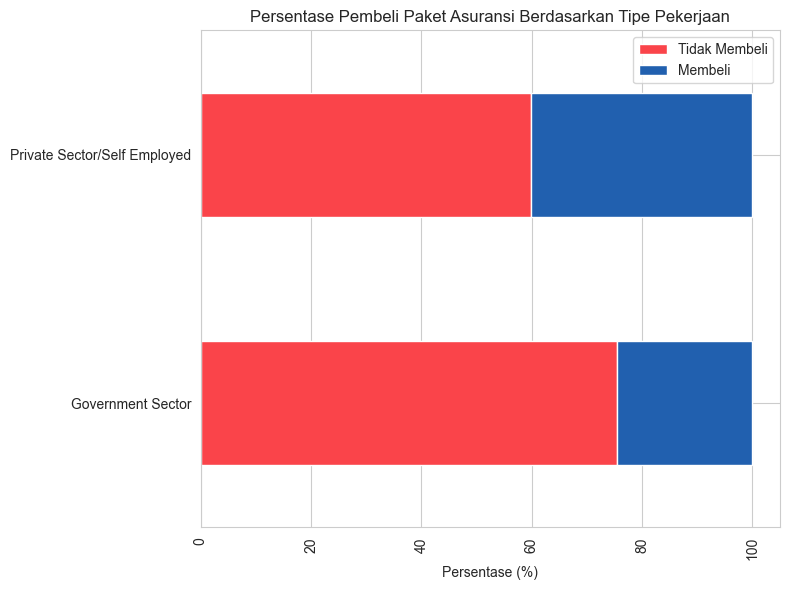

In [ ]:
# Plot TravelInsurance consumption based on EmploymentType
employment = ['Government Sector', 'Private Sector/Self Employed']
fig, axes = plt.subplots(figsize = (8, 6))

axes1 = et1_percentage.plot(kind='barh', stacked=True, ax = axes, color = colors )
axes1.set_yticklabels(employment)  # Set the new x-axis labels

plt.legend(['Tidak Membeli', 'Membeli'])

for label in axes1.get_xticklabels():
    label.set_rotation(90)

plt.title('Persentase Pembeli Paket Asuransi Berdasarkan Tipe Pekerjaan')
plt.xlabel('Persentase (%)')

plt.tight_layout()
plt.show()

> Insight : Pelanggan dengan tipe pekerjaan private sector/self employed lebih tertarik membeli travel insurance sebesar 80% dibanding government sector yang hanya tertarik 20% saja.

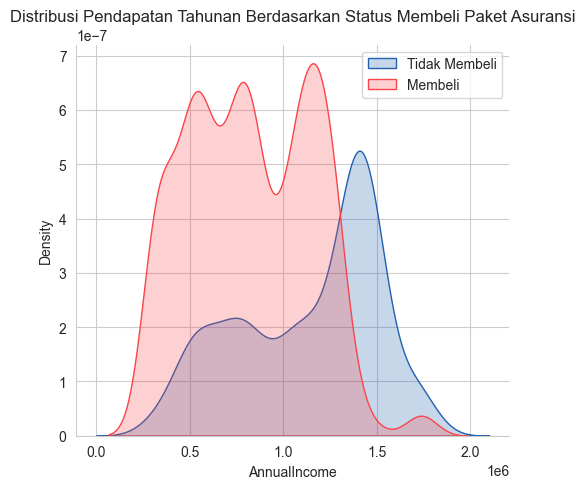

In [ ]:
# Plot TravelInsurance according to AnualInconme
axes1=sns.displot(df, x = 'AnnualIncome',hue = 'TravelInsurance',kind='kde',fill=True, palette = colors, legend=False)
plt.title('Distribusi Pendapatan Tahunan Berdasarkan Status Membeli Paket Asuransi')
plt.legend(['Tidak Membeli', 'Membeli'])
plt.tight_layout()
plt.show()

> Insight : Terjadi kenaikan tajam pada pelanggan dengan pendapatan tahunan
diatas 1.3M untuk tertarik untuk membeli asuransi perjalanan.


In [ ]:
# Check TravelInsurance percentages according to GraduateOrNot
gr1 = df.groupby(['GraduateOrNot','TravelInsurance']).size().unstack().reset_index()
gr1['total'] = gr1.sum(axis=1)

gr1_percentage = gr1.copy()
for col in gr1_percentage.columns[1:-1]:
    gr1_percentage[col] = gr1_percentage[col] / gr1_percentage['total'] * 100


gr1_percentage = gr1_percentage.drop('total', axis=1)
gr1_percentage = gr1_percentage.reset_index(drop=True)

gr1_percentage

TravelInsurance,GraduateOrNot,0,1
0,No,66.440678,33.559322
1,Yes,63.888889,36.111111


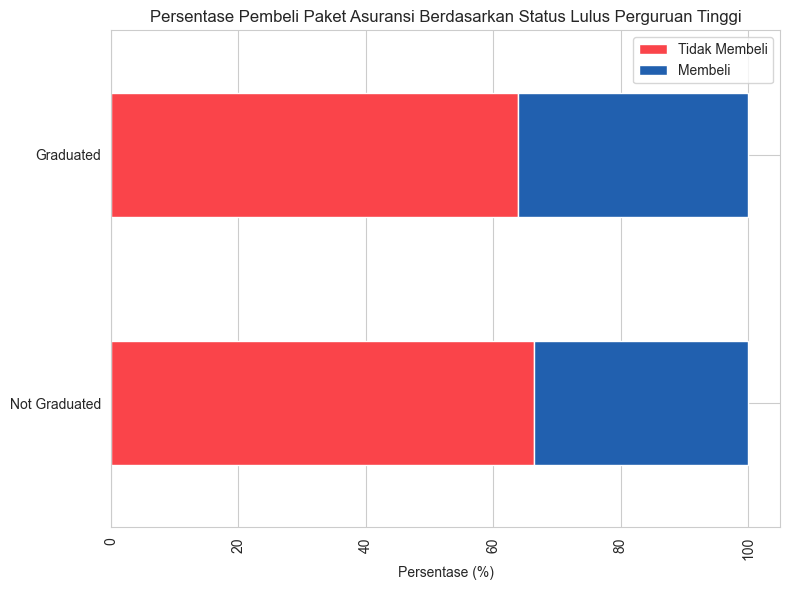

In [ ]:
# Plot TravelInsurance consumption based on GraduateOrNot
graduate = ['Not Graduated', 'Graduated']
fig, axes = plt.subplots(figsize = (8, 6))

axes1 = gr1_percentage.plot(kind='barh', stacked=True, ax = axes, color = colors )
axes1.set_yticklabels(graduate)  # Set the new x-axis labels

plt.legend(['Tidak Membeli', 'Membeli'])

for label in axes1.get_xticklabels():
    label.set_rotation(90)

plt.title('Persentase Pembeli Paket Asuransi Berdasarkan Status Lulus Perguruan Tinggi')
plt.xlabel('Persentase (%)')

plt.tight_layout()

plt.show()

> Insigt : Pelanggan dengan lulusan perguruan tinggi ataupun bukan, tidak memiliki dampak pada ketertarikan pembelian travel insurance.



In [ ]:
# Check TravelInsurance percentages according to FamilyMembers
fm1 = df.groupby(['FamilyMembers','TravelInsurance']).size().unstack().reset_index()
fm1['total'] = fm1.drop('FamilyMembers', axis=1).sum(axis=1)

fm1_percentage = fm1.copy()
for col in fm1_percentage.columns[1:3]:
    fm1_percentage[col] = fm1_percentage[col] / fm1_percentage['total'] * 100

fm1_percentage = fm1_percentage.drop('total', axis=1)
fm1_percentage = fm1_percentage.reset_index(drop=True)
fm1_percentage = fm1_percentage.drop('FamilyMembers', axis=1)

fm1_percentage

TravelInsurance,0,1
0,70.967742,29.032258
1,64.190981,35.809019
2,68.316832,31.683168
3,69.248826,30.751174
4,56.122449,43.877551
5,54.494382,45.505618
6,64.406780,35.593220
7,52.727273,47.272727


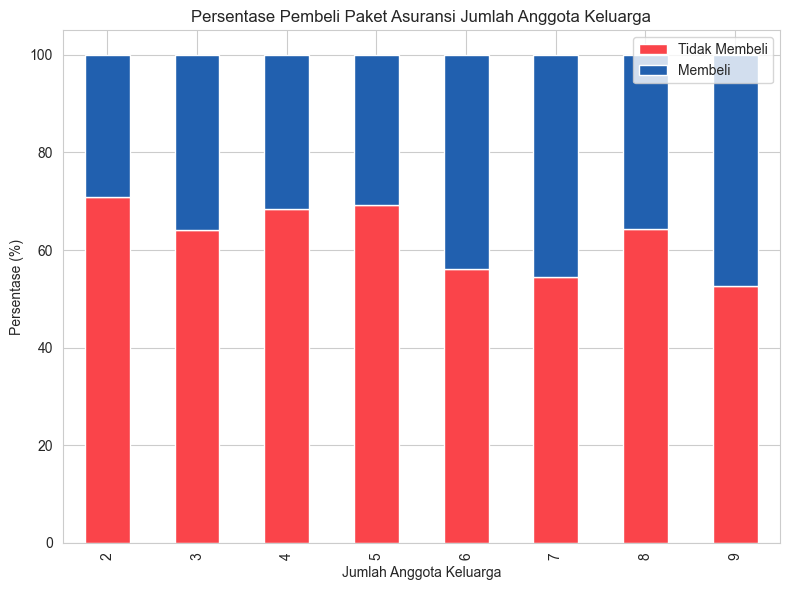

In [ ]:
# Plot TravelInsurance consumption based on FamilyMembers
familymember = list(range(2, 10))
fig, axes = plt.subplots(figsize = (8, 6))

axes1 = fm1_percentage.plot(kind='bar', stacked=True, ax = axes, color = colors )
axes1.set_xticklabels(list(familymember))  # Set the new x-axis labels

plt.legend(['Tidak Membeli', 'Membeli'])

for label in axes1.get_xticklabels():
    label.set_rotation(90)

plt.title('Persentase Pembeli Paket Asuransi Jumlah Anggota Keluarga')
plt.xlabel('Jumlah Anggota Keluarga')
plt.ylabel('Persentase (%)')
plt.tight_layout()

plt.show()

> Insight : Keluarga dengan jumlah anggota 6 orang keatas lebih terlihat tertarik untuk membeli travel insurance, sedangkan yang berjumlah 2 orang terlihat hanya sedikit yang tertarik dan keluarga dengan anggota 3-5 orang agak banyak tertarik.



In [ ]:
# Check TravelInsurance percentages according to ChronicDiseases
cd1 = df.groupby(['ChronicDiseases','TravelInsurance']).size().unstack().reset_index()
cd1['total'] = cd1.sum(axis=1)

cd1_percentage = cd1.copy()
for col in cd1_percentage.columns[1:-1]:
    cd1_percentage[col] = cd1_percentage[col] / cd1_percentage['total'] * 100

cd1_percentage = cd1_percentage.drop('total', axis=1)
cd1_percentage = cd1_percentage.reset_index(drop=True)

cd1_percentage

TravelInsurance,ChronicDiseases,0,1
0,0,64.808362,35.191638
1,1,62.748644,37.070524


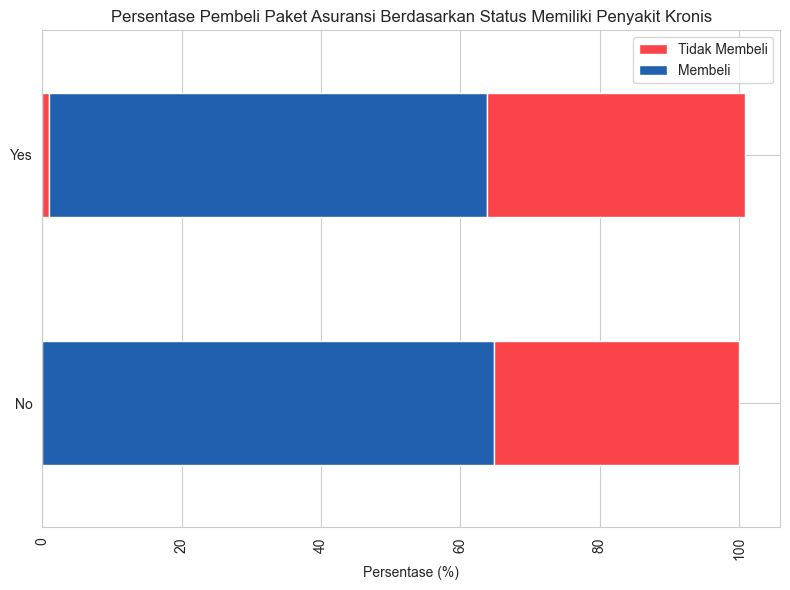

In [ ]:
# Plot TravelInsurance consumption based on ChronicDiseases
chronic = ['No', 'Yes']
fig, axes = plt.subplots(figsize = (8, 6))

axes1 = cd1_percentage.plot(kind='barh', stacked=True, ax = axes, color = colors )
axes1.set_yticklabels(chronic)  # Set the new x-axis labels

plt.legend(['Tidak Membeli', 'Membeli'])

for label in axes1.get_xticklabels():
    label.set_rotation(90)

plt.title('Persentase Pembeli Paket Asuransi Berdasarkan Status Memiliki Penyakit Kronis')
plt.xlabel('Persentase (%)')
plt.tight_layout()

plt.show()

> Insight : Pelanggan dengan penyakit bawaan maupun tidak, tidak memiliki dampak yang signifikan pada pembelian travel insurance.

In [ ]:
# Check TravelInsurance percentages according to EverTravelledAbroad
eta1 = df.groupby(['EverTravelledAbroad','TravelInsurance']).size().unstack().reset_index()
eta1['total'] = eta1.sum(axis=1)

eta1_percentage = eta1.copy()
for col in eta1_percentage.columns[1:-1]:
    eta1_percentage[col] = eta1_percentage[col] / eta1_percentage['total'] * 100

eta1_percentage = eta1_percentage.drop('total', axis=1)
eta1_percentage = eta1_percentage.reset_index(drop=True)

eta1_percentage

TravelInsurance,EverTravelledAbroad,0,1
0,No,74.362166,25.637834
1,Yes,21.578947,78.421053


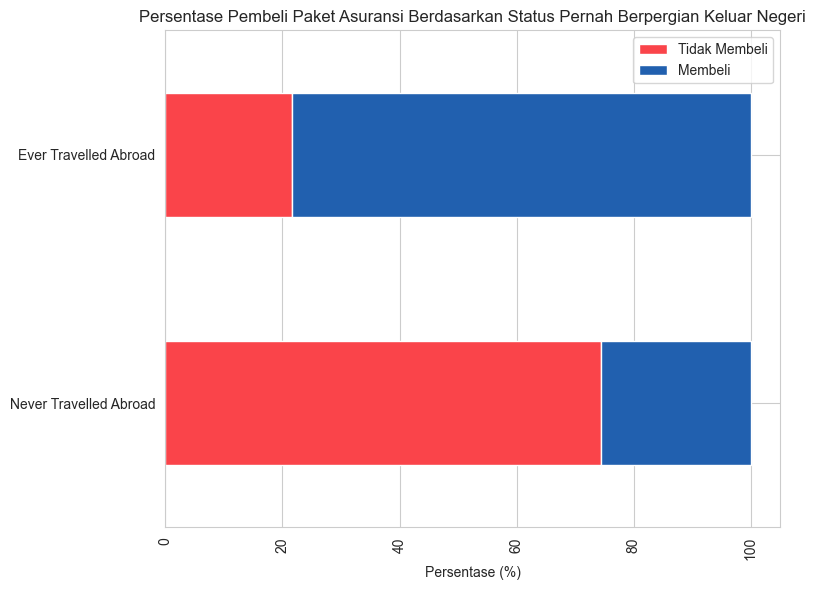

In [ ]:
# Plot TravelInsurance consumption based on EverTravelledAbroad
travel = ['Never Travelled Abroad', 'Ever Travelled Abroad']
fig, axes = plt.subplots(figsize = (8, 6))

axes1 = eta1_percentage.plot(kind='barh', stacked=True, ax = axes, color = colors )
axes1.set_yticklabels(travel)  # Set the new x-axis labels

plt.legend(['Tidak Membeli', 'Membeli'])


for label in axes1.get_xticklabels():
    label.set_rotation(90)

plt.title('Persentase Pembeli Paket Asuransi Berdasarkan Status Pernah Berpergian Keluar Negeri')
plt.xlabel('Persentase (%)')
plt.tight_layout()

plt.show()

> Insight : Secara signifikan pelanggan yang melakukan perjalanan abroad lebih banyak tertarik untuk membeli travel insurance yaitu sebesar 42% dibanding yang tidak membeli. Sedangkan pelanggan yang tidak melakukan perjalanan abroad merasa tidak tertarik untuk membeli travel insurance.

In [ ]:
# Check TravelInsurance percentages according to FrequentFlyer
ff1 = df.groupby(['FrequentFlyer','TravelInsurance']).size().unstack().reset_index()
ff1['total'] = ff1.sum(axis=1)

ff1_percentage = ff1.copy()
for col in ff1_percentage.columns[1:-1]:
    ff1_percentage[col] = ff1_percentage[col] / ff1_percentage['total'] * 100

ff1_percentage = ff1_percentage.drop('total', axis=1)
ff1_percentage = ff1_percentage.reset_index(drop=True)

ff1_percentage

TravelInsurance,FrequentFlyer,0,1
0,No,70.000000,30.000000
1,Yes,42.685851,57.314149


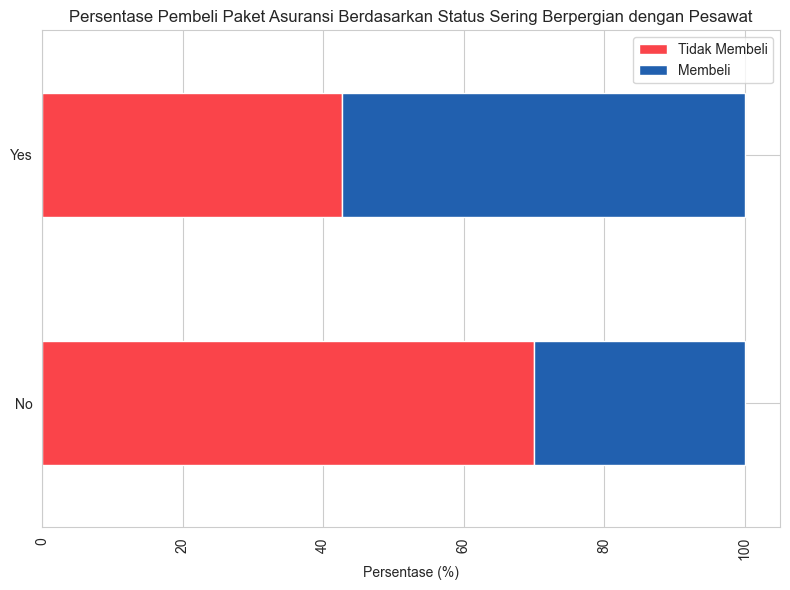

In [ ]:
# Plot TravelInsurance consumption based on FrequentFlyer
freqflyer = ['No', 'Yes']
fig, axes = plt.subplots(figsize = (8, 6))

axes1 = ff1_percentage.plot(kind='barh', stacked=True, ax = axes, color = colors )
axes1.set_yticklabels(freqflyer)  # Set the new x-axis labels

plt.legend(['Tidak Membeli', 'Membeli'])

for label in axes1.get_xticklabels():
    label.set_rotation(90)

plt.title('Persentase Pembeli Paket Asuransi Berdasarkan Status Sering Berpergian dengan Pesawat')
plt.xlabel('Persentase (%)')
plt.tight_layout()

plt.show()

> Insight : Pelanggan yang sering melakukan penerbangan lebih banyak tertarik untuk membeli travel insurance.

### 2.2 High Level Analysis (3 Parameters or more) :

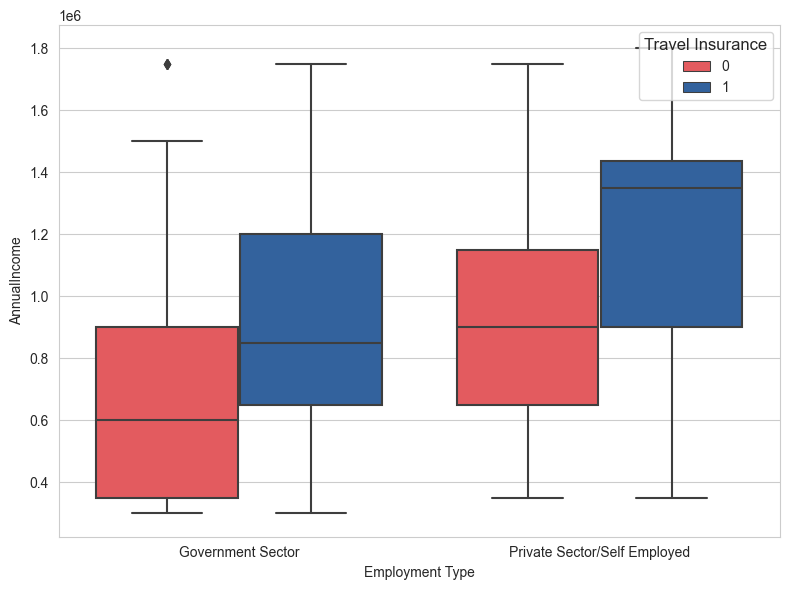

In [ ]:
# Create grouped boxplot
fig, axes = plt.subplots(figsize = (8, 6))

sns.boxplot(x = df['Employment Type'],
            y = df['AnnualIncome'],
            hue = df['TravelInsurance'], palette = colors)

# Show plot and set legend on upper-right corner
plt.legend(title='Travel Insurance', title_fontsize=12, fontsize=10, loc='upper right')
plt.tight_layout()
plt.show()

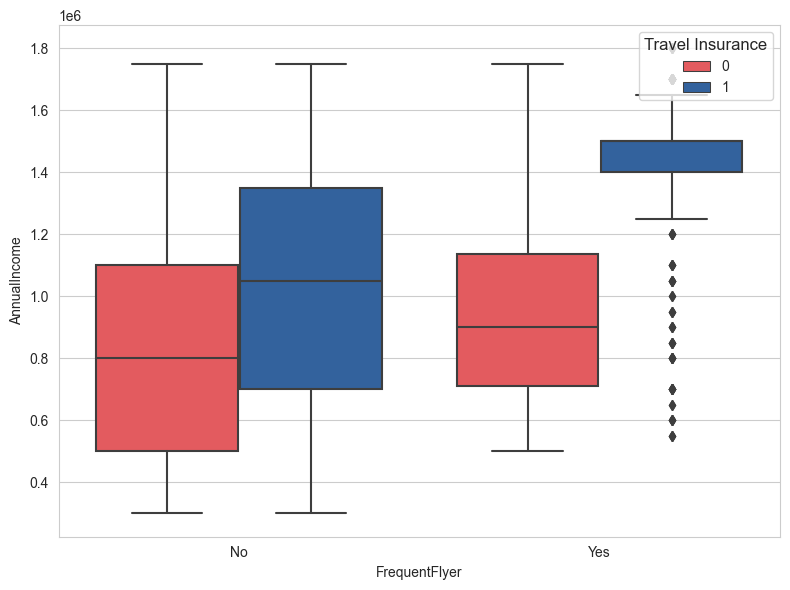

In [ ]:
# Create grouped boxplot
fig, axes = plt.subplots(figsize = (8, 6))
sns.boxplot(x = df['FrequentFlyer'],
            y = df['AnnualIncome'],
            hue = df['TravelInsurance'], palette = colors)

# Show plot and set legend on upper-right corner
plt.legend(title='Travel Insurance', title_fontsize=12, fontsize=10, loc='upper right')
plt.tight_layout()
plt.show()

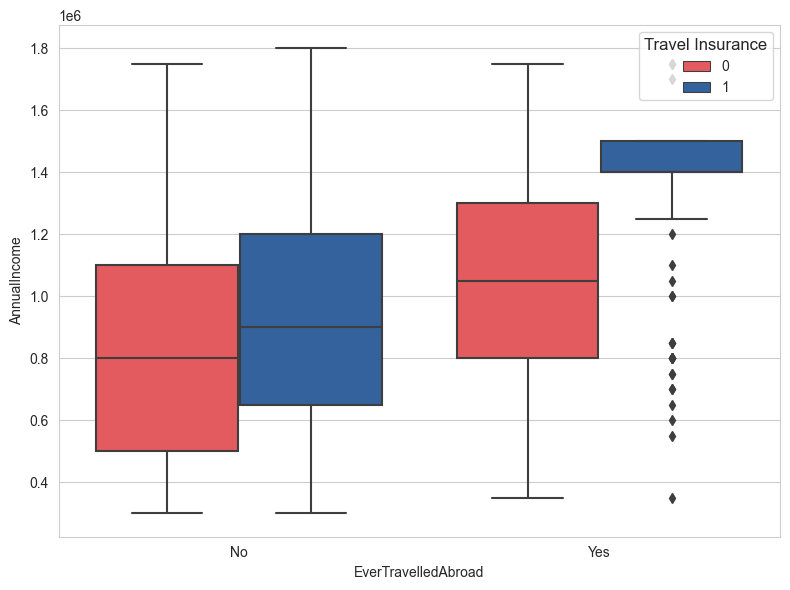

In [ ]:
# Create grouped boxplot
fig, axes = plt.subplots(figsize = (8, 6))
sns.boxplot(x = df['EverTravelledAbroad'],
            y = df['AnnualIncome'],
            hue = df['TravelInsurance'], palette = colors)

# Show plot and set legend on upper-right corner
plt.legend(title='Travel Insurance', title_fontsize=12, fontsize=10, loc='upper right')
plt.tight_layout()
plt.show()

### 2.3 Business Recommendations :
1. Menargetkan promo penawaran terhadap target pelanggan dengan kriteria :
    - bekerja di private sector/self employment.
    - memiliki annual income diatas 1.3M.
    - merupakan lulusan perguruan tinggi.
    - pernah melakukan perjalanan keluar negeri.
    - Sering melakukan penerbangan.
2. Melakukan pembagian umur menjadi 3 kategori dan promo penawaran dengan target pelanggan yang berumur kurang dari 26 tahun dan diatas 33 tahun.
3. Membagi jumlah anggota keluarga menjadi 3 kategori.
4. Membuat prioritas terhadap pelanggan dengna kriteria :
    - Memprioritaskan penawaran kepada pelanggan yang bekerja di private sector dan memiliki annual income 1,0 - 11,4 M .
    - Memiliki annual income 0,8 - 1,4 M yang belum sering melakukan penerbangan.
    - Memprioritaskan kepada pelanggan yang belum pernah melakukan penerbangan ke luar negeri dan memiliki pendapatan sekitar 0,7 - 1,2 M.




# Stage II : Data Preprocessing

## 3 Data Cleansing :

### 3.1 Handling Missing Values :

> Berdasarkan hasil deteksi missing values pada Stage I, tidak ditemukan missing values


In [ ]:
# Count all missing Values
num_missing = df.isnull().sum().sum()
print('Total missing data: ', num_missing)

Total missing data:  0


### 3.2 Handling Duplicated Values :

> Berdasarkan hasil deteksi duplicated values pada Stage I, tidak ditemukan duplicated values

In [ ]:
# Count all duplicated Values
num_duplicates = df.duplicated().sum()
print('Total duplicated values: ', num_duplicates)

Total duplicated values:  0


### 3.3 Handling Outliers :

> Berdasarkan hasil deteksi outliers pada Stage I, tidak ditemukan adanya fitur yang memiliki outliers

Data cleansing tidak diperlukan karena datanya sudah bersih dari missing values, duplicated values dan outliers

## 4 Feature Engineering :

### 4.1 Feature Extraction :

Data External, Avarage annual salary in India according to :
1. https://in.talent.com/salary?job=private+sector
2. https://in.talent.com/salary?job=government

Berdasarkan hal diatas, kami membuat asumsi dengan membagi kategori AnnualIncome menjadi:
 - Low : under 600.000 INR
 - Median : start from 600.000 INR
 - High : start from 1.450.000 INR

In [ ]:
# Segment according to AnnualIncome
df['AnnualCategory'] = np.where(df['AnnualIncome'] <= 330000, 'Very Low',
                       np.where(df['AnnualIncome'] <= 600000, 'Low',
                       np.where(df['AnnualIncome'] <= 1450000, 'Med', 'High')))

In [ ]:
# Check correct segmentation in a sample of 10 rows
df.sample(10)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualCategory
1157,1157,28,Private Sector/Self Employed,Yes,800000,5,1,No,No,1,Med
87,87,28,Government Sector,Yes,300000,6,0,No,No,0,Very Low
1308,1308,31,Private Sector/Self Employed,Yes,1250000,7,1,No,No,0,Med
419,419,25,Private Sector/Self Employed,No,1150000,4,0,No,No,0,Med
1629,1629,34,Private Sector/Self Employed,Yes,1000000,5,0,Yes,No,0,Med
365,365,25,Private Sector/Self Employed,No,1700000,3,0,Yes,No,1,High
1272,1272,33,Government Sector,Yes,650000,3,0,No,No,1,Med
1353,1353,33,Private Sector/Self Employed,Yes,1200000,2,0,No,No,0,Med
294,294,29,Private Sector/Self Employed,Yes,1200000,4,0,No,No,0,Med
1148,1148,28,Private Sector/Self Employed,Yes,700000,5,0,Yes,No,0,Med


In [ ]:
# Business Recommendation: Membagi jumlah anggota keluarga menjadi 3 kategori.

# Creating a numpy array of Age values
x = df['FamilyMembers'].values

# List of new categories
categories = [0, 1, 2]

# New column based on certain conditions
df['FamilyCategory']=np.select([x<=2, x<=5, x>=6],categories)

In [ ]:
# Business Recommendation: Melakukan pembagian umur menjadi 3 kategori dan promo penawaran dengan target pelanggan yang berumur kurang dari 26 tahun dan diatas 33 tahun.

# Creating a numpy array of Age values
x = df['Age'].values

# List of new categories
categories = [0, 1, 2]

# New column based on certain conditions
df['AgeCategory']=np.select([x<=26, x<=33, x>33],categories)



> Berdasarkan Business Recommendation dengan point: Membagi jumlah anggota keluarga menjadi 3 kategori, yaitu angka 0 untuk jumlah anggota keluarga <=2, angka 1 untuk jumlah anggota keluarga <=5, dan angka 2 untuk jumlah anggota keluarga >=6.





> Berdasarkan Business Recommendation dengan point: Melakukan pembagian umur menjadi 3 kategori dan promo penawaran dengan target pelanggan yang berumur kurang dari 26 tahun dan diatas 33 tahun. Maka feature Age ini kami buat kategori dengan menambahkan feature AgeCategory dengan 3 (tiga) kategori yaitu angka 0 untuk umur <=26, angka 1 untuk umur <=33, dan angka 2 untuk umur >33.



> Rename kolom Unnamed:0 menjadi IDNumber karena berdasarkan eksperimen, jika kolom ini dihapus atau dijadikan index maka duplikat data menjadi banyak, sehingga kami asumsikan kolom ini sebagai IDNumber.



### 4.2 Feature Encoding :

In [ ]:
# Feature Encoding
le = LabelEncoder()
label_encode_ft = ['Employment Type','GraduateOrNot',
                   'FrequentFlyer', 'EverTravelledAbroad',
                   'TravelInsurance','AnnualCategory']

label_encode(df)


> Pada tahapan ini tidak melakukan feature encoding menggunakan one hot encoding karena tidak ada data kategorik yang memenuhi kriteria

> Sehingga feature encoding dilakukan hanya menggunakan teknik label encoding

### 4.3 Feature Selection :

In [ ]:
#Rename kolom Unnamed:0 menjadi IDNumber karena berdasarkan eksperimen, jika kolom ini dihapus atau dijadikan index maka duplikat data menjadi banyak, sehingga kami asumsikan kolom ini sebagai IDNumber
df= df.rename(columns = {"Unnamed: 0": "IDNumber"})
df.head()

,IDNumber,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualCategory,FamilyCategory,AgeCategory
0,0,31,0,1,400000,6,1,0,0,0,1,2,1
1,1,31,1,1,1250000,7,0,0,0,0,2,2,1
2,2,34,1,1,500000,4,1,0,0,1,1,1,2
3,3,28,1,1,700000,3,1,0,0,0,2,1,1
4,4,28,1,1,700000,8,1,1,0,0,2,2,1


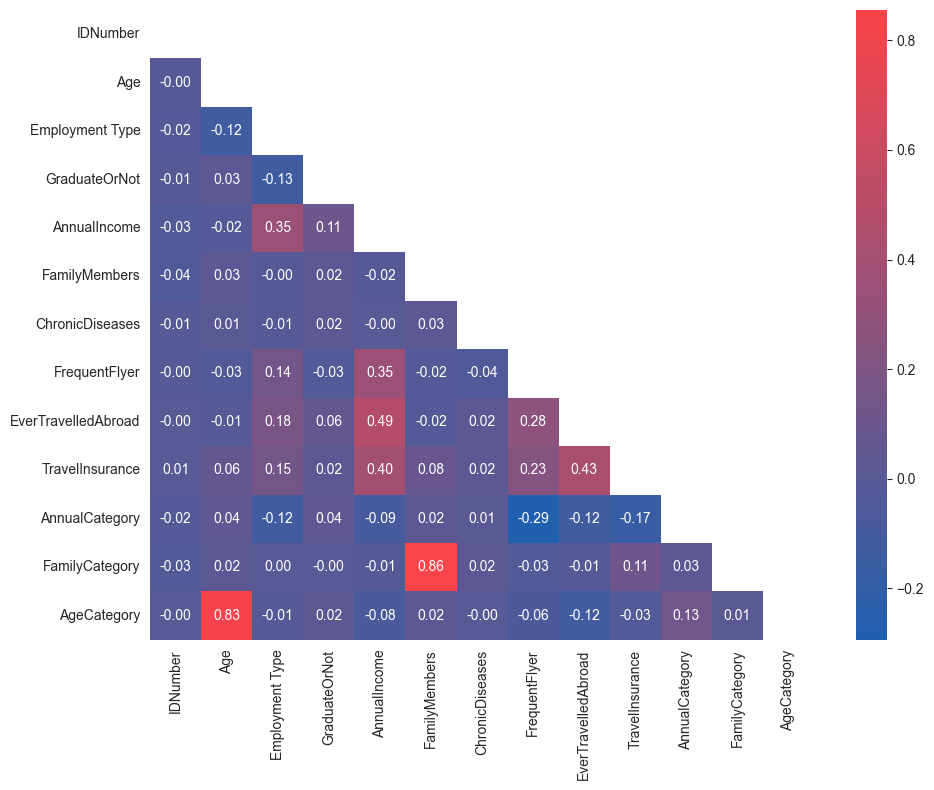

In [ ]:
# creating mask
mask = np.triu(np.ones_like(df.corr()))
# plotting a triangle correlation heatmap
plt.figure(figsize=(10,8))
dataplot = sns.heatmap(df.corr(), cmap=colors_cmap, annot=True, fmt='.2f', mask=mask)
# displaying heatmap
plt.tight_layout()
plt.show()

> Feature yang diremove adalah : IDNumber, AgeCategory & FamilyMembers

> Feature IDNumber diremove karena merupakan fitur dengan setiap value yang unik / berbeda

> Feature AgeCategory diremove karena memiliki korelasi yang tinggi dengan Age (0.83) dan memiliki kekuatan korelasi yang lebih rendah terhadap label (-0.03) dibandingkan Age (0.06)

> Feature FamilyMembers diremove karena memiliki korelasi yang tinggi dengan FamilyMembers (0.86) dan memiliki kekuatan korelasi yang lebih rendah terhadap label (0.08) dibandingkan Family Members (0.11)

In [ ]:
# Feature removal
df = df.drop(['IDNumber', 'AgeCategory', 'FamilyMembers'], axis=1)

### 4.4 Additional Feature Ideas:

Beberapa fitur tambahan yang dinilai dapat meningkatkan performa model ialah sebagai berikut : </n>
1. Fitur Total harga pmbelian tiket perjalanan setiap customer
2. Fitur Jangka Waktu perjalanan (berapa lama calon pelanggan akan berada di luar negeri. Durasi perjalanan dapat mempengaruhi jenis dan biaya asuransi perjalanan yang sesuai)
3. Fitur Preferensi cakupan (jenis cakupan asuransi perjalanan yang mereka inginkan, seperti cakupan medis, bantuan darurat, pembatalan perjalanan, dan sebagainya)
4. Fitur Aktivitas perjalanan (apakah mereka berencana untuk melakukan olahraga ekstrem atau kegiatan berisiko tinggi lainnya yang memerlukan perlindungan tambahan)
5. Fitur Fleksibilitas (apakah asuransi dapat menyesuaikan cakupan dan masa berlaku sesuai kebutuhan)
6. Fitur waktu konsumen membeli asuransi (untuk keperluan time-series analysis secara lebih mendalam)
7. Fitur Konsumen Merupakan Seorang Orang Tua (untuk mengklasifikasi dengan konsumen yang bukan merupakan orang tua, karena orang tua cenderung lebih hati hati dan lebih mungkin untuk membeli asuransi)

### 4.5 Feature Scaling :

In [ ]:
# Feature Transformation/Feature Scaling
unstandardized_ft = ['Age', 'AnnualIncome']
standardize(df)

## 5 Handling Class Imbalance :

In [ ]:
#Split data to handle imbalance
X = df.drop('TravelInsurance', axis=1)
y = df['TravelInsurance']

In [ ]:
# Check data proportions
total = len(y)
prop_notravin, prop_yestravin = (y.value_counts()[0]/total) * 100, (y.value_counts()[1]/total) * 100
print(f'Proportion of No TravelInsurance {prop_notravin:.2f}%')
print(f'Proportion of Yes TravelInsurance {prop_yestravin:.2f}%')

Proportion of No TravelInsurance 64.27%
Proportion of Yes TravelInsurance 35.73%


In [ ]:
# Handling Imbalanced Dataset
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
# Check proportions after balancing data
total = len(y_res)
prop_notravin_res, prop_yestravin_res = (y_res.value_counts()[0]/total) * 100, (y_res.value_counts()[1]/total) * 100
print(f'Proportion of No TravelInsurace {prop_notravin_res:.2f}%')
print(f'Proportion of Yes TravelInsurance {prop_yestravin_res:.2f}%')

Proportion of No TravelInsurace 50.00%
Proportion of Yes TravelInsurance 50.00%


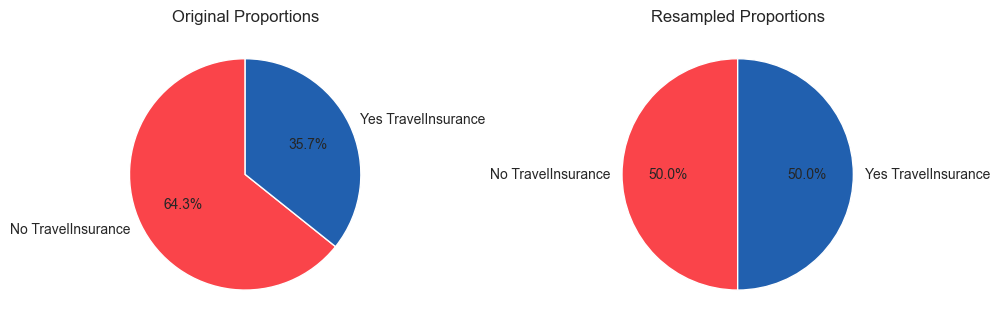

In [ ]:
#Plot Data balancing
# Original proportions
prop_notravin_original = prop_notravin / 100
prop_yestravin_original = prop_yestravin / 100

# Resampled proportions
prop_notravin_resampled = prop_notravin_res / 100
prop_yestravin_resampled = prop_yestravin_res / 100

# Data for pie charts
original_props = [prop_notravin_original, prop_yestravin_original]
resampled_props = [prop_notravin_resampled, prop_yestravin_resampled]

labels = ['No TravelInsurance', 'Yes TravelInsurance']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original pie chart
axes[0].pie(original_props, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette(colors))
axes[0].set_title('Original Proportions')

# Resampled pie chart
axes[1].pie(resampled_props, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette(colors))
axes[1].set_title('Resampled Proportions')

plt.tight_layout()
plt.show()

-> Further steps

-  Melakukan split data training 80% dan 20% data testing dengan X sebagai feature-feature dan y sebagai target. Kami memiliki jumlah data yang sedikit pada data set sehingga membagi data training 80% dan data set 20% akan lebih optimal.
-  Jumlah records pada training dan test dataset masing-masing adalah 1589 dan 398.
-  Stratify=y : Untuk memastikan proporsi 0 dan 1 untuk target pada data train dan test sama.

## 6 Data Preprocessing Conclusions :
1. Tidak terdapat missing value pada data.
2. Tidak terdapat duplicated values pada data.
3. Tidak terdapat data yang outlier.
4. Telah dilakukan  perubahan nama kolom Unnamed:0 menjadi IDNumber.
5. Membuat pembagian umur menjadi 3 kategori, yaitu: kurang dari 26 tahun, 26 - 33 tahun dan diatas 33 tahun.
6. Membagi jumlah anggota keluarga menjadi 3 kategori, yaitu jumlah anggota keluarga <=2, 2 - 5, dan >=6.
7. Melakukan drop columns ‘Age’ dan ‘FamilyMember’ karena memiliki korelasi yang lebih besar dengan target, yaitu ‘TravelInsurance’.
8. Telah dilakukan Feature Scaling pada colom IDNumber, AgeCategory & FamilyMembers.
9. Telah dilakukan scaling dan encoding pada kolom ‘Employment Type’, ‘GraduationOrNot’, ‘FrequentFlyer’, ‘EverTravelledAbroad’, ‘TravelInsurance’ dan ‘AnnualCategory'.
10. Data bersifat imbalance dengan perbedaan yes 64,27% dan no 35,73%.
11. Setelah dilakukan handle imbalance proporsi data telah sama sama 50%.

# Stage III : Model Training

## 7 Data Splitting :

In [ ]:
# Split Feature and Label
X = df.drop('TravelInsurance', axis=1)
y = df['TravelInsurance'] # target / label

# Split data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42, stratify=y)

# Check number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])

The number of records in the training dataset is 1589
The number of records in the test dataset is 398


## 8 Model Training & Evaluation :

## 8.1 Model Training & Evaluation (Before Hyperparameter Tuning) :

In [ ]:
# Memanggil objek model
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)
models = [logreg, dt, rf, gbc, ada]

for model in models :
    eval_classification(model)

ML Model : LogisticRegression()
Precision (Train Set): 0.81
Precision (Test Set): 0.75
Accuracy (Train Set): 0.78
Accuracy (Test Set): 0.77
----------------------------------------------------------------------------------------------------
ML Model : DecisionTreeClassifier()
Precision (Train Set): 0.96
Precision (Test Set): 0.76
Accuracy (Train Set): 0.89
Accuracy (Test Set): 0.78
----------------------------------------------------------------------------------------------------
ML Model : RandomForestClassifier(random_state=42)
Precision (Train Set): 0.93
Precision (Test Set): 0.81
Accuracy (Train Set): 0.89
Accuracy (Test Set): 0.80
----------------------------------------------------------------------------------------------------
ML Model : GradientBoostingClassifier(random_state=42)
Precision (Train Set): 0.93
Precision (Test Set): 0.89
Accuracy (Train Set): 0.84
Accuracy (Test Set): 0.82
-------------------------------------------------------------------------------------------

**Observation**
- Dari 5 model yang telah dilatih, 3 model terbaik yang akan dipilih untuk dilakukan Hyperparameter Tuning adalah :
    - AdaBoostClassifier
    - GradientBoostingClassifier
    - RandomForestClassifier
- 3 Model tersebut akan ditingkatkan performanya melalui hyperparameter tuning untu kemudian dipilih satu model terbaik dan melakukan analisis feature importance

## 8.2 Model Training & Evaluation (After Hyperparameter Tuning) :

In [ ]:
# hyperparameter tuning
penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.1, 1000)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
rs_lr = RandomizedSearchCV(logreg, hyperparameters, scoring='precision', cv=2)
rs_lr.fit(X_train, y_train)
eval_classification(rs_lr)

# print best parameter after tuning
print("Best Parameter:",rs_lr.best_params_)
# print how our model looks after hyper-parameter tuning
print("Best Estimator:",rs_lr.best_estimator_)

ML Model : RandomizedSearchCV(cv=2, estimator=LogisticRegression(),
                   param_distributions={'C': [0.0001, 0.0002,
                                              0.00030000000000000003, 0.0004,
                                              0.0005, 0.0006000000000000001,
                                              0.0007000000000000001, 0.0008,
                                              0.0009000000000000001, 0.001,
                                              0.0011, 0.0012000000000000001,
                                              0.0013000000000000002,
                                              0.0014000000000000002, 0.0015,
                                              0.0016, 0.0017000000000000001,
                                              0.0018000000000000002,
                                              0.0019000000000000002, 0.002,
                                              0.0021, 0.0022, 0.0023, 0.0024,
                                       

In [ ]:
# hyperparameter tuning
max_depth = [3]
min_samples_split = [88, 89]
min_samples_leaf = [44, 45]
max_features = ['auto', 'sqrt']
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, scoring='precision', cv=2)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
eval_classification(model)

ML Model : RandomizedSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [44, 45],
                                        'min_samples_split': [88, 89],
                                        'splitter': ['best', 'random']},
                   scoring='precision')
Precision (Train Set): 0.92
Precision (Test Set): 0.88
Accuracy (Train Set): 0.79
Accuracy (Test Set): 0.78
----------------------------------------------------------------------------------------------------


### 8.2.1 Random Forest :

In [ ]:
# hyperparameter tuning
n_estimators = [10, 30, 50, 100]
criterion = ['gini','entropy']
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)]
min_samples_split = [2, 5, 10, 100]
min_samples_leaf = [1, 2, 4, 10, 20, 50]
max_features = ['auto', 'sqrt']


hyperparameters = dict(n_estimators=n_estimators,
                       criterion=criterion,
                       max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                      )

# Inisialisasi Model
rf = RandomForestClassifier(random_state=42)
model = RandomizedSearchCV(rf, hyperparameters, scoring='precision', cv=2)
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)
eval_classification(model)

ML Model : RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 4, 8, 12, 16, 19, 23,
                                                      27, 31, 34, 38, 42, 46,
                                                      49, 53, 57, 61, 64, 68,
                                                      72, 76, 79, 83, 87, 91,
                                                      94, 98, 102, 106, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 10, 20,
                                                             50],
                                        'min_samples_split': [2, 5, 10, 100],
                                        'n_estimators': [10, 30, 50, 100]},
                   scoring='precision')
Precision (Train Set): 0.91
Precisio

### 8.2.2 Gradient Boosting :

In [ ]:
# hyperparameter tuning
max_depth = [1,3,5,7,9]
min_samples_split = [2, 5, 10, 100]
n_estimators = [1,50,100,250,500]
criterion = ['friedman_mse','mse']
learning_rate = [0.01,0.1,1,10,100]

para = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       n_estimators=n_estimators,
                        criterion = criterion,
            learning_rate = learning_rate
                      )

modelgbc = RandomizedSearchCV(gbc, para, scoring='precision', cv=2, random_state=42).fit(X_train, y_train)
eval_classification(modelgbc)

ML Model : RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'criterion': ['friedman_mse', 'mse'],
                                        'learning_rate': [0.01, 0.1, 1, 10,
                                                          100],
                                        'max_depth': [1, 3, 5, 7, 9],
                                        'min_samples_split': [2, 5, 10, 100],
                                        'n_estimators': [1, 50, 100, 250, 500]},
                   random_state=42, scoring='precision')
Precision (Train Set): 0.93
Precision (Test Set): 0.89
Accuracy (Train Set): 0.81
Accuracy (Test Set): 0.79
----------------------------------------------------------------------------------------------------


### 8.2.3 AdaBoost :

In [ ]:
# hyperparameter tuning
params= {
    'base_estimator': ['deprecated','tree'],
    'learning_rate': [0.01,0.1,1,10,100],
    'n_estimators': [1,50,100,250,500]}

clf_model=RandomizedSearchCV(ada, params, scoring='precision', cv=2, random_state=42).fit(X_train, y_train)
eval_classification(clf_model)

ML Model : RandomizedSearchCV(cv=2, estimator=AdaBoostClassifier(random_state=42),
                   param_distributions={'base_estimator': ['deprecated',
                                                           'tree'],
                                        'learning_rate': [0.01, 0.1, 1, 10,
                                                          100],
                                        'n_estimators': [1, 50, 100, 250, 500]},
                   random_state=42, scoring='precision')
Precision (Train Set): 0.92
Precision (Test Set): 0.88
Accuracy (Train Set): 0.79
Accuracy (Test Set): 0.78
----------------------------------------------------------------------------------------------------


**Observation**
- Dari 3 model yang telah dilakukan hyperparameter tuning, satu model dengan performa terbaik adalah model GradientBoostingClassifier
- Kami menyarankan untuk menggunakan model tersebut untuk aplikasi prediksi peristiwa membeli tiket asuransi perjalanaN

## 8.3 Feature Importance

In [ ]:
# build the best estimator variable : GradientBoosting
bestmodel = modelgbc.best_estimator_
value = bestmodel.feature_importances_

# Create new dataframe : Feat_importance
feat_importance = pd.DataFrame({'Value' : value, 'Feature' : X.columns})
feat_importance = feat_importance.sort_values(by = 'Value', ascending=False)

In [ ]:
# Custom colors
primary = '#fa444aff'
secondary = '#2160afff'
colors = [primary, secondary]
colors_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", [secondary, primary])

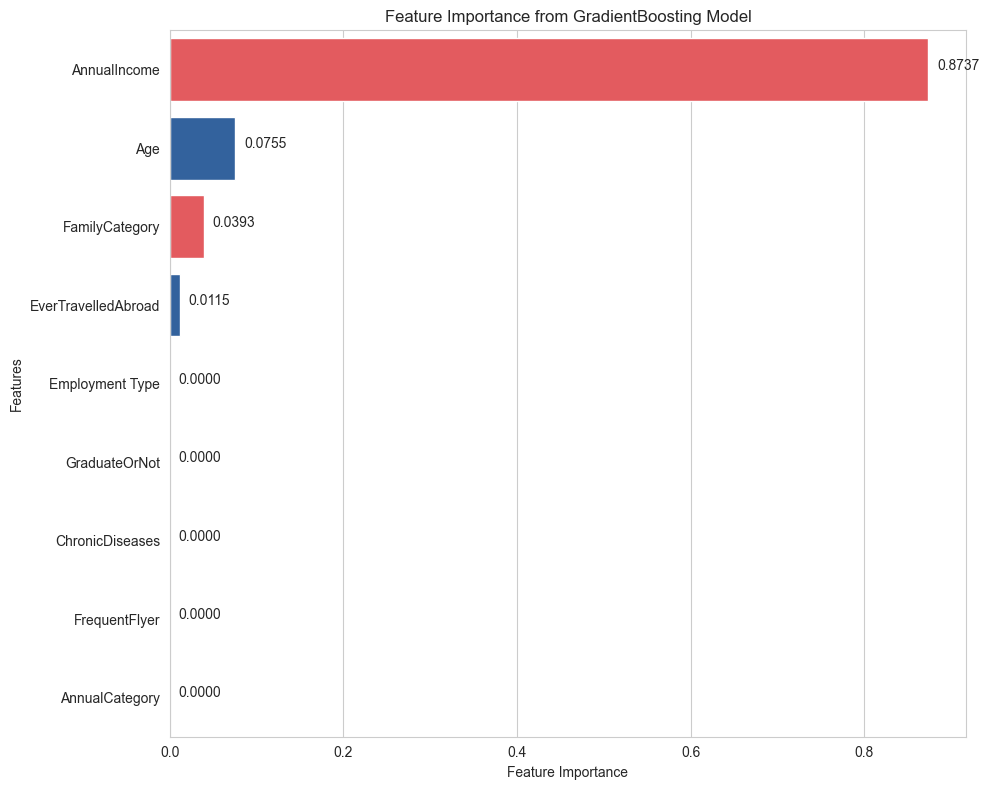

In [ ]:
# create matplotlib figure
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

# Create a bar plot
ax = sns.barplot(y=feat_importance['Feature'], x=feat_importance['Value'], orient='h', palette=colors )

# Add labels and title
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from GradientBoosting Model')

# Add annotations to the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.01, p.get_y() + p.get_height() / 2.0, '{:.4f}'.format(width), ha='left')

# Show the plot
plt.tight_layout()
plt.show()

**Observation**
- 4 Fitur yang memiliki pengaruh tinggi dalam memprediksi peristiwa membeli paket asuransi perjalanan secara berurut ialah sebagai berikut :
    1. AnnualIncome
    2. Age
    3. FamilyCategory
    4. EverTravelledAboard
- Fitur AnnualIncome memiliki pengaruh yang sangat tinggi dengan proporsi mencapai ~85%. Sangat besar dibanding fitur lainnya yang menyumbang proporsi lebih kecil
- Hasil Feature Importance menunjukkan bahwa faktor paling besar yang berkontribusi terhadap seorang pelanggan membeli paket asuransi perjalanan adalah pendapatan tahunan. Semakin tinggi pendapatan seseorang, cenderung akan membeli paket asuransi paket perjalanan dan begitu pula sebaliknya

**Action Items** </br>
Action Items yang kami ajukan merespons temuan analisis feature importance ialah sebagai berikut :
- Menyusun marketing yang berfokus terhadap calon konsumen berpendapatan tinggi. Identifikasi solusi yang bisa ditawarkan terhadap calon konsumen tersebut agar tertarik membeli paket asuransi perjalanan
- Meningkatkan luas cakupan asuransi perjalanan untuk meningkatkan daya saing paket asuransi dibanding kompetitor
- Calon customer dengan pendapatan tinggi cenderung tidak sensitif terhadap harga, namun sensitif terhadap kualitas pelayanan. Perlu peningkatan pelayanan untuk meenjaga kepuasan konsumen